In [ ]:
!pip install openpyxl
import openpyxl
print("openpyxl installed successfully!")


In [ ]:
ACQUISITION OF DATA SOURCE

In [1]:
import pandas as pd


url = "https://docs.google.com/spreadsheets/d/1tTSFo89c10193Y4tn5jn5Km4BULbOxnM/export?format=xlsx"

try:
    # Reading the Excel file
    data = pd.read_excel(url, engine="openpyxl")
    print("Data loaded successfully!")
    print(data.head())
except Exception as e:
    print(f"Error: {e}")


Data loaded successfully!
  COMPANY      PRODUCT   TYPENAME  INCHES  RAM     OS  WEIGHT  PRICE_EUROS  \
0   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1339.69   
1   Apple  Macbook Air  Ultrabook    13.3    8  macOS    1.34       898.94   
2      HP       250 G6   Notebook    15.6    8  No OS    1.86       575.00   
3   Apple  MacBook Pro  Ultrabook    15.4   16  macOS    1.83      2537.45   
4   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1803.60   

     SCREEN  SCREENW  ...  RETINADISPLAY CPU_COMPANY CPU_FREQ      CPU_MODEL  \
0  Standard     2560  ...            Yes       Intel      2.3        Core i5   
1  Standard     1440  ...             No       Intel      1.8        Core i5   
2   Full HD     1920  ...             No       Intel      2.5  Core i5 7200U   
3  Standard     2880  ...            Yes       Intel      2.7        Core i7   
4  Standard     2560  ...            Yes       Intel      3.1        Core i5   

  PRIMARYSTORAGE  SECOND

In [ ]:
pip install pandas sqlalchemy pyodbc openpyxl


In [3]:
import pandas as pd
from sqlalchemy import create_engine

# Step 1: Use the direct download link to load the data
url = "https://docs.google.com/spreadsheets/d/1tTSFo89c10193Y4tn5jn5Km4BULbOxnM/export?format=xlsx"  # Replace with your actual URL
data = pd.read_excel(url, engine="openpyxl")

# Preview the dataset 
print("Preview of the dataset:")
print(data.head())

# Step 2: Defining MSSQL database credentials 
server = 'laptopinstance.cziwu8cq47ck.us-east-1.rds.amazonaws.com,1433'  
database = 'laptop'   
username = 'admin'        
password = 'Aa1abcdabcd'

# Step 3: Creation of connection string
connection_string = f"mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"

# Step 4: Connecting to the databases and loading the data
try:
    engine = create_engine(connection_string)
    table_name = 'laptop_data'  # Name of the table where the data will be stored
    data.to_sql(table_name, con=engine, if_exists='append', index=False)

    print(f"Data successfully inserted into the table '{table_name}'.")

except Exception as e:
    print(f"Error: {e}")

finally:
    # Disposing the engine to close the connection
    if 'engine' in locals():
        engine.dispose()
        print("Database connection closed.")


Preview of the dataset:
  COMPANY      PRODUCT   TYPENAME  INCHES  RAM     OS  WEIGHT  PRICE_EUROS  \
0   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1339.69   
1   Apple  Macbook Air  Ultrabook    13.3    8  macOS    1.34       898.94   
2      HP       250 G6   Notebook    15.6    8  No OS    1.86       575.00   
3   Apple  MacBook Pro  Ultrabook    15.4   16  macOS    1.83      2537.45   
4   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1803.60   

     SCREEN  SCREENW  ...  RETINADISPLAY CPU_COMPANY CPU_FREQ      CPU_MODEL  \
0  Standard     2560  ...            Yes       Intel      2.3        Core i5   
1  Standard     1440  ...             No       Intel      1.8        Core i5   
2   Full HD     1920  ...             No       Intel      2.5  Core i5 7200U   
3  Standard     2880  ...            Yes       Intel      2.7        Core i7   
4  Standard     2560  ...            Yes       Intel      3.1        Core i5   

  PRIMARYSTORAGE  SECONDAR

In [ ]:
PSUEDO BATCH PROCESS

In [ ]:
import pandas as pd
from sqlalchemy import create_engine
import time
from datetime import datetime

# Defining the remote data source (Google Sheets direct download link)
url = "https://docs.google.com/spreadsheets/d/1tTSFo89c10193Y4tn5jn5Km4BULbOxnM/export?format=xlsx"

# Defining MSSQL database credentials
server = 'laptopinstance.cziwu8cq47ck.us-east-1.rds.amazonaws.com,1433'
database = 'laptop'
username = 'admin'
password = 'Aa1abcdabcd'


connection_string = f"mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"

# Function to fetch and process the data
def batch_process():
    try:
        print(f"Batch process started at {datetime.now()}")

        # Step 1: Fetch data from the remote source
        print("Fetching data from the remote source...")
        data = pd.read_excel(url, engine="openpyxl")

        # Step 2: Connect to the database
        print("Connecting to the database...")
        engine = create_engine(connection_string)

        # Step 3: Handle duplicate records
        print("Inserting/updating data into the database...")
        table_name = 'laptop_data'  # Database table name

        with engine.connect() as connection:
            # Load existing data from the table
            existing_data = pd.read_sql(f"SELECT * FROM {table_name}", connection)

            # Compare and find new rows (assuming your table has matching columns)
            new_data = data[~data.isin(existing_data)].dropna(how='all')

            if not new_data.empty:
                new_data.to_sql(table_name, con=engine, if_exists='append', index=False)
                print(f"{len(new_data)} new rows inserted.")
            else:
                print("No new data found.")

    except Exception as e:
        print(f"Error: {e}")

    finally:
        if 'engine' in locals():
            engine.dispose()
            print("Database connection closed.")

# Scheduling the batch process to run once a day
print("Starting the daily pseudo-batch process...")
while True:
    batch_process()
    print(f"Batch process completed. Next run in 24 hours.")
    time.sleep(86400)  # Wait for 24 hours (86400 seconds)


Starting the daily pseudo-batch process...
Batch process started at 2024-12-04 16:58:41.547415
Fetching data from the remote source...
Connecting to the database...
Inserting/updating data into the database...
No new data found.
Database connection closed.
Batch process completed. Next run in 24 hours.


In [ ]:
import pandas as pd

# Loading dataset
url = "https://docs.google.com/spreadsheets/d/1tTSFo89c10193Y4tn5jn5Km4BULbOxnM/export?format=xlsx"
data = pd.read_excel(url, engine="openpyxl")

# Displaying the first few rows
print("Dataset Preview:")
print(data.head())

# Summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Data types and null values
print("\nDataset Information:")
print(data.info())


In [ ]:
#LOADING AND EXPLORING DATA USING NUMPY AND PANDA

In [ ]:

import pandas as pd
import numpy as np

# Loading the dataset
url = "https://docs.google.com/spreadsheets/d/1tTSFo89c10193Y4tn5jn5Km4BULbOxnM/export?format=xlsx"
data = pd.read_excel(url, engine="openpyxl")

# Displaying dataset info and preview
print("Dataset Info:")
print(data.info())
print("\nFirst 5 rows of the dataset:")
print(data.head())

# Calculating summary statistics using Pandas
print("\nSummary Statistics:")
print(data.describe())

# Calculating mean and standard deviation using Numpy
price_mean = np.mean(data['Price'])
price_std = np.std(data['Price'])
print(f"\nPrice Mean: {price_mean}, Price Std Dev: {price_std}")


In [3]:
# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
COMPANY                 0
PRODUCT                 0
TYPENAME                0
INCHES                  0
RAM                     0
OS                      0
WEIGHT                  0
PRICE_EUROS             0
SCREEN                  0
SCREENW                 0
SCREENH                 0
TOUCHSCREEN             0
IPSPANEL                0
RETINADISPLAY           0
CPU_COMPANY             0
CPU_FREQ                0
CPU_MODEL               0
PRIMARYSTORAGE          0
SECONDARYSTORAGE        0
PRIMARYSTORAGETYPE      0
SECONDARYSTORAGETYPE    0
GPU_COMPANY             0
GPU_MODEL               0
dtype: int64


In [ ]:
VISUALISATIONS:

In [ ]:
A. Frequency of Laptop Brands (Bar Chart - Matplotlib)

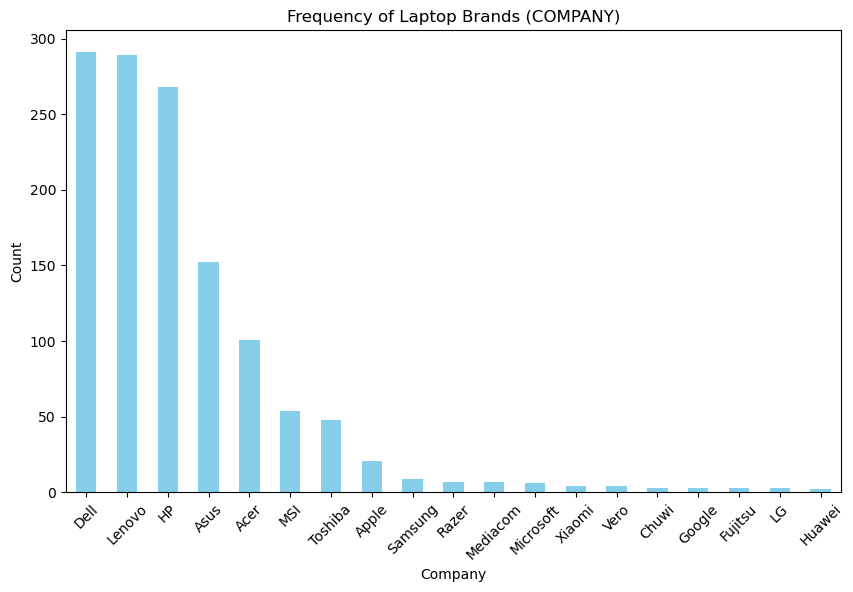

In [6]:
import matplotlib.pyplot as plt

# Count the frequency of each company (brand)
company_counts = data['COMPANY'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
company_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Laptop Brands (COMPANY)')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
B. Storage Type Distribution (Pie Chart - Seaborn)

PRIMARYSTORAGETYPE
SSD              837
HDD              359
Flash Storage     71
Hybrid             8
Name: count, dtype: int64


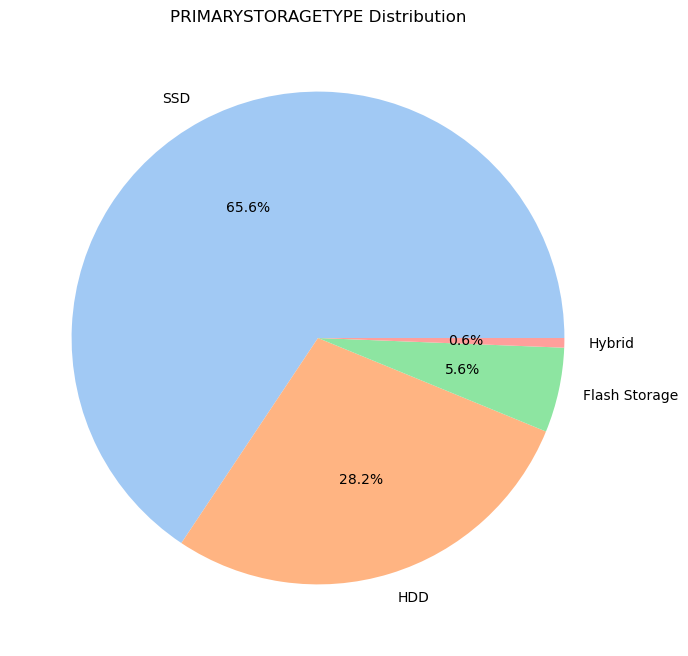

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


storage_column = 'PRIMARYSTORAGETYPE'  

# Verification of column existence
if storage_column in data.columns:
    
    storage_counts = data[storage_column].value_counts()
    print(storage_counts)

    #  pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(storage_counts, labels=storage_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    plt.title(f'{storage_column} Distribution')
    plt.show()
else:
    print(f"Error: Column '{storage_column}' not found in the dataset.")


In [ ]:
C.Price Distribution (Histogram - Matplotlib & Numpy)

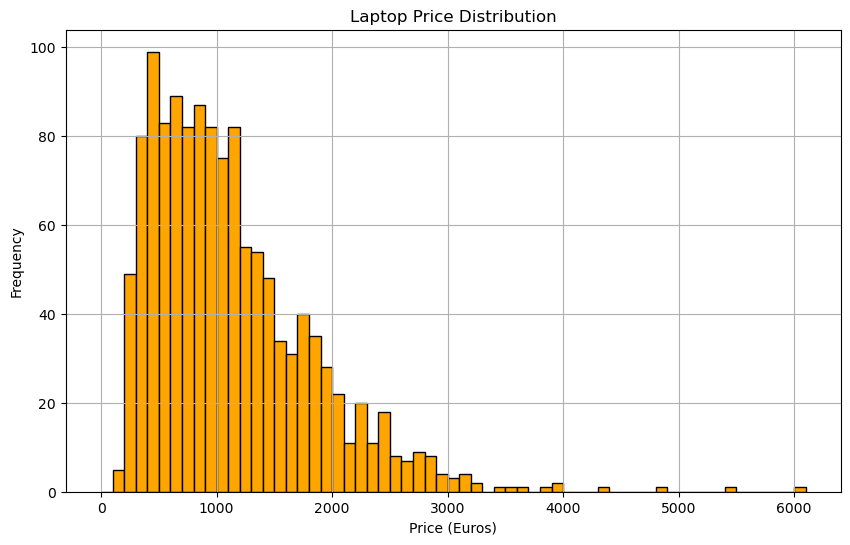

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Creation of  bins for price ranges using Numpy
bins = np.arange(0, data['PRICE_EUROS'].max() + 100, 100)

# histogram
plt.figure(figsize=(10, 6))
plt.hist(data['PRICE_EUROS'], bins=bins, color='orange', edgecolor='black')
plt.title('Laptop Price Distribution')
plt.xlabel('Price (Euros)')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('price_distribution.png', dpi=300)  # Save the plot
plt.show()


In [ ]:
D.Average Price by RAM Size (Line Chart - Seaborn)

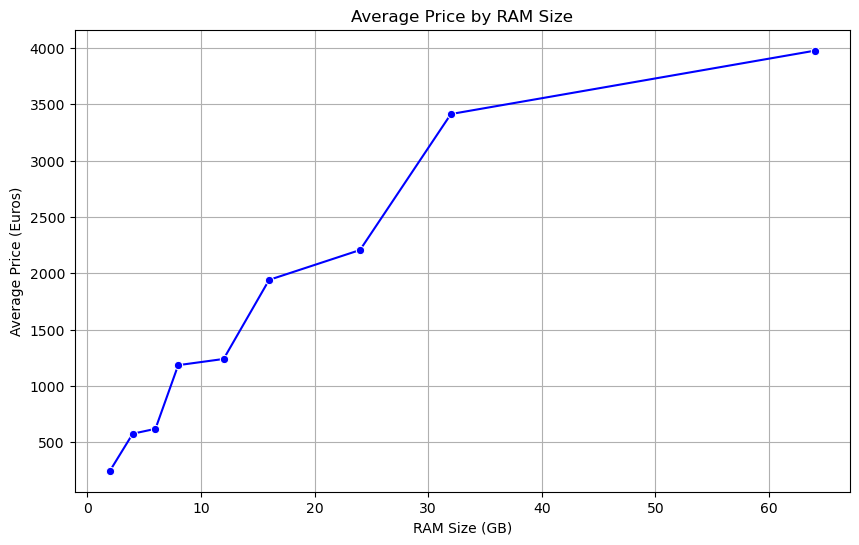

In [16]:
import seaborn as sns

# Grouping by RAM size and calculating average price
avg_price_by_ram = data.groupby('RAM')['PRICE_EUROS'].mean().reset_index()

# line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_price_by_ram, x='RAM', y='PRICE_EUROS', marker='o', color='blue')
plt.title('Average Price by RAM Size')
plt.xlabel('RAM Size (GB)')
plt.ylabel('Average Price (Euros)')
plt.grid()
plt.savefig('average_price_by_ram.png', dpi=300)  # Save the plot
plt.show()


In [ ]:
 E.Price vs. Screen Size (Scatter Plot - Seaborn)

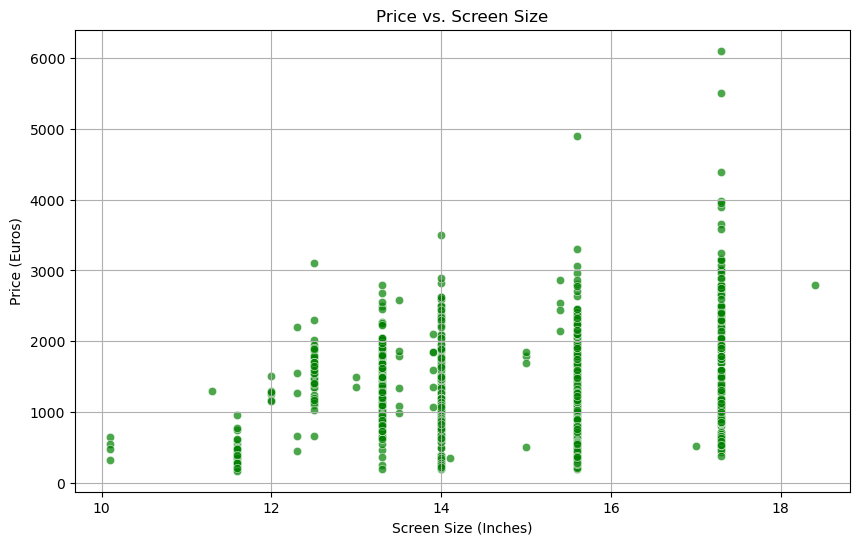

In [17]:
# Scatter plot for Price vs. Screen Size
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='INCHES', y='PRICE_EUROS', color='green', alpha=0.7)
plt.title('Price vs. Screen Size')
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Price (Euros)')
plt.grid(True)
plt.savefig('price_vs_screen_size.png', dpi=300) 
plt.show()
